In [38]:
#### Inicio de la lectura de datos
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
dataset = "IRIS.csv"
iris_data = pd.read_csv(dataset)
print(iris_data.head(5))

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


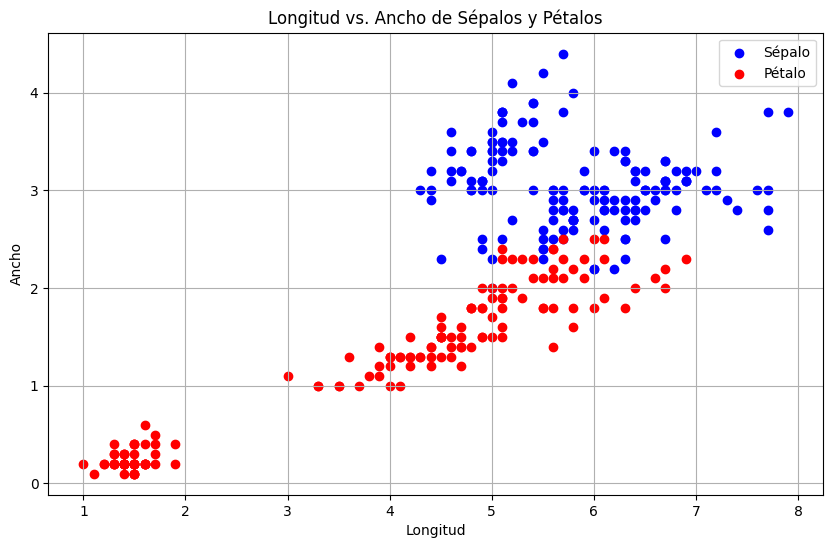

In [6]:
# Crear un gráfico de dispersión

plt.figure(figsize=(10, 6))
plt.scatter(iris_data['sepal_length'], iris_data['sepal_width'], c='blue', label='Sépalo')
plt.scatter(iris_data['petal_length'], iris_data['petal_width'], c='red', label='Pétalo')
plt.xlabel('Longitud')
plt.ylabel('Ancho')
plt.title('Longitud vs. Ancho de Sépalos y Pétalos')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

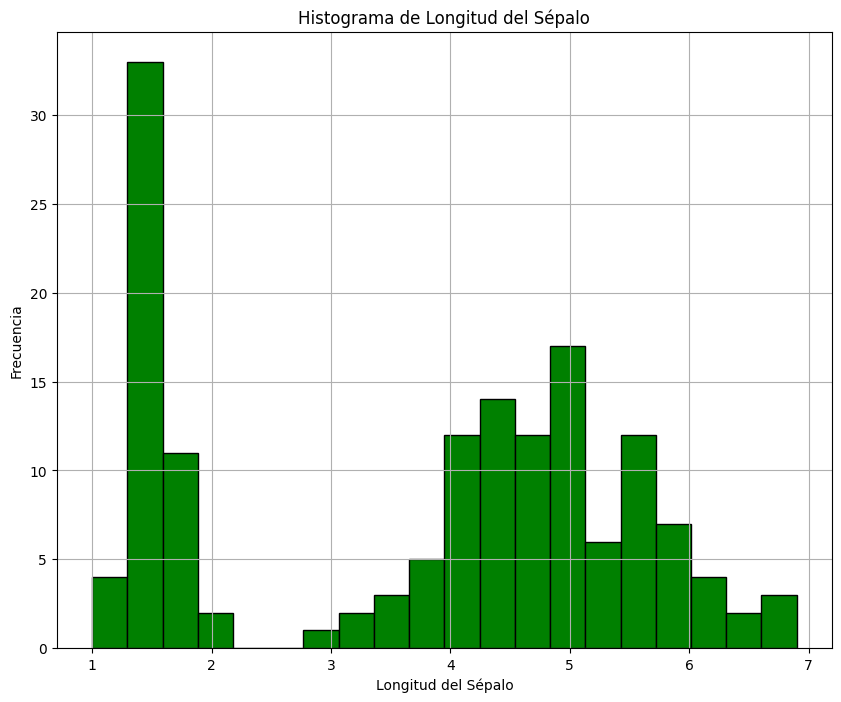

In [43]:
# Crear un histograma para la longitud del sépalo
plt.figure(figsize=(10, 8))
plt.hist(iris_data['petal_length'], bins=20, color='green', edgecolor='black')
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Frecuencia')
plt.title('Histograma de Longitud del Sépalo')
plt.grid(True)

# Mostrar el histograma
plt.show()

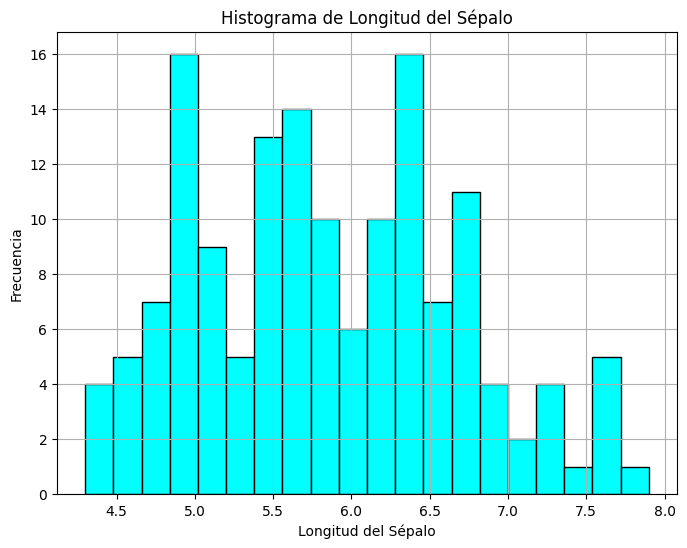

In [44]:
# Crear un histograma para la longitud del sépalo
plt.figure(figsize=(8, 6))
plt.hist(iris_data['sepal_length'], bins=20, color='cyan', edgecolor='black')
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Frecuencia')
plt.title('Histograma de Longitud del Sépalo')
plt.grid(True)

# Mostrar el histograma
plt.show()

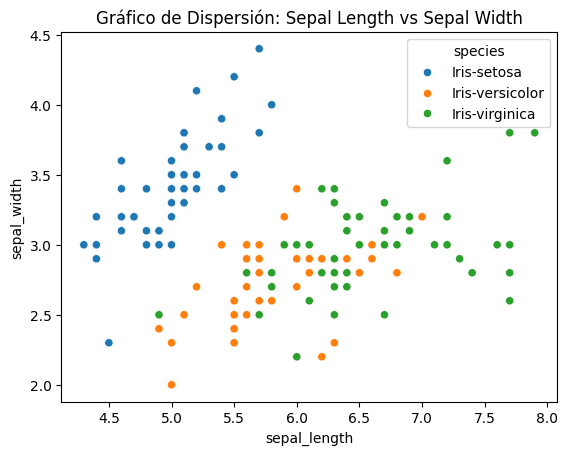

In [40]:
# Gráfico de dispersión para sepal_length y sepal_width
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris_data)
plt.title('Gráfico de Dispersión: Sepal Length vs Sepal Width')
plt.show()

In [8]:


def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority voye
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [36]:
X = iris_data.drop("species", axis=1)  # Features
y = iris_data["species"]  # Target labels
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0, shuffle=True)

In [54]:
possible_k_values = range(1, 50)
kAccuracy = {}
for i in possible_k_values:
    knn = KNN(k=i)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"k: {i}, Accuracy: {accuracy}")
    kAccuracy[i] = accuracy
print(f" valores de k: {kAccuracy.keys()}")
print(f" valores de precisión: {kAccuracy.values()}")

k: 1, Accuracy: 1.0
k: 2, Accuracy: 1.0
k: 3, Accuracy: 0.9666666666666667
k: 4, Accuracy: 1.0
k: 5, Accuracy: 0.9666666666666667
k: 6, Accuracy: 1.0
k: 7, Accuracy: 1.0
k: 8, Accuracy: 1.0
k: 9, Accuracy: 1.0
k: 10, Accuracy: 1.0
k: 11, Accuracy: 1.0
k: 12, Accuracy: 1.0
k: 13, Accuracy: 1.0
k: 14, Accuracy: 1.0
k: 15, Accuracy: 1.0
k: 16, Accuracy: 1.0
k: 17, Accuracy: 1.0
k: 18, Accuracy: 1.0
k: 19, Accuracy: 1.0
k: 20, Accuracy: 1.0
k: 21, Accuracy: 1.0
k: 22, Accuracy: 1.0
k: 23, Accuracy: 1.0
k: 24, Accuracy: 1.0
k: 25, Accuracy: 1.0
k: 26, Accuracy: 1.0
k: 27, Accuracy: 0.9666666666666667
k: 28, Accuracy: 0.9666666666666667
k: 29, Accuracy: 0.9666666666666667
k: 30, Accuracy: 0.9666666666666667
k: 31, Accuracy: 0.9333333333333333
k: 32, Accuracy: 0.9333333333333333
k: 33, Accuracy: 0.9333333333333333
k: 34, Accuracy: 0.9666666666666667
k: 35, Accuracy: 0.9333333333333333
k: 36, Accuracy: 0.9333333333333333
k: 37, Accuracy: 0.9333333333333333
k: 38, Accuracy: 0.9333333333333333
k

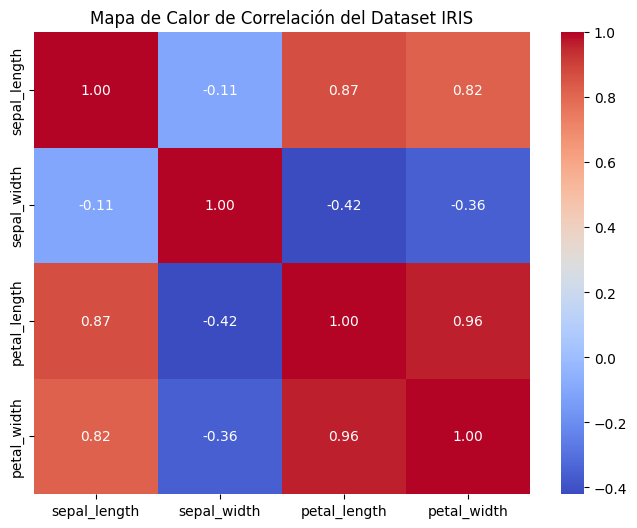

In [50]:
# Calcular la matriz de correlación
datos_numericos = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

matriz_correlacion = datos_numericos.corr()

# Crear el mapa de calor utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación del Dataset IRIS')
plt.show()

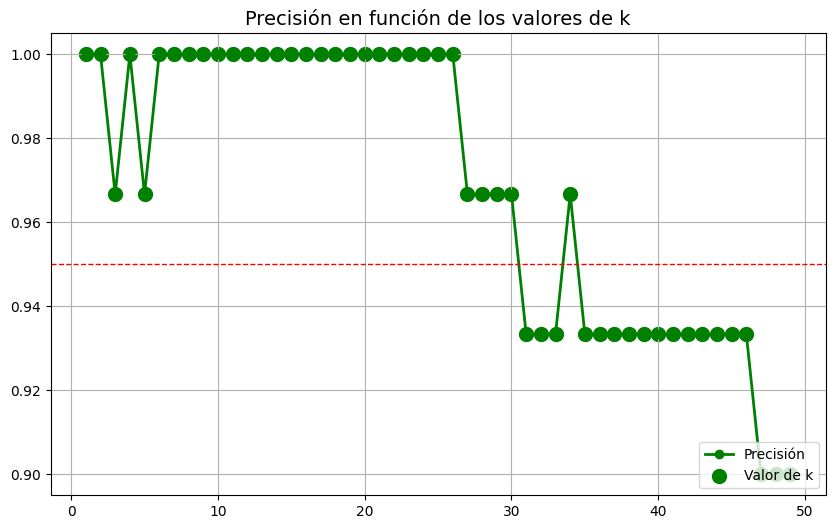

In [59]:


# Crear un gráfico de línea de la precisión en función de los valores de k
plt.figure(figsize=(10, 6))
plt.plot(kAccuracy.keys(), kAccuracy.values(), marker='o', linestyle='-', color='g', linewidth=2, label='Precisión')
plt.scatter(kAccuracy.keys(), kAccuracy.values(), color='g', s=100, label='Valor de k')
plt.title('Precisión en función de los valores de k', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
# Añadir leyenda
plt.legend(loc='lower right', fontsize=10)

# Añadir una línea horizontal para destacar cierta precisión
plt.axhline(y=0.95, color='r', linestyle='--', linewidth=1)

# Mostrar el gráfico
plt.show()